In [ ]:
import os

print(os.getcwd())

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score

training_files: list[str] = ['Features_Variant_1.csv', 'Features_Variant_2.csv', 'Features_Variant_3.csv',
                             'Features_Variant_4.csv', 'Features_Variant_5.csv']
PATH_TRAIN: str = "data-in/lab_3/Dataset/Training/"
PATH_TEST: str = "data-in/lab_3/Dataset/Testing/TestSet/"

# Training sets
combined_train: pd.DataFrame = pd.concat(
    [pd.read_csv(PATH_TRAIN + f, index_col=False, header=None) for f in training_files], sort=False)

X_train_all = combined_train.iloc[:, :-1]
y_train_all = combined_train.iloc[:, -1:]

original_X_train_list = []
y_train_list = []

for i in range(5):
    original_X_train_list.append(pd.read_csv(PATH_TRAIN + training_files[i], index_col=False, header=None).iloc[:, :-1])
    y_train_list.append(pd.read_csv(PATH_TRAIN + training_files[i], index_col=False, header=None).iloc[:, -1:])

original_X_train_list.append(X_train_all)
y_train_list.append(y_train_all)

# Testing sets

test_files = ['Test_Case_1.csv', 'Test_Case_2.csv', 'Test_Case_3.csv',
              'Test_Case_4.csv', 'Test_Case_5.csv', 'Test_Case_5.csv',
              'Test_Case_6.csv', 'Test_Case_7.csv', 'Test_Case_8.csv',
              'Test_Case_9.csv', 'Test_Case_10.csv']

for f in test_files:
    test = pd.concat([pd.read_csv(PATH_TEST + f)])
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1:]

X_train_list = original_X_train_list.copy()
# Grid Search (?)
# used the orinignal x training instances instead of the modifies ones
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


def grid_search(model):
    for i in range(6):
        scores = cross_val_score(model, original_X_train_list[i], y_train_list[i],
                                 scoring="neg_mean_squared_error", cv=10)
        rmse_scores = np.sqrt(-scores)
        if i == 5:
            print("Variant overall: ")
        else:
            print("Variant {0}: ".format(i + 1))
        display_scores(rmse_scores)


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
for i in range(6):
    lin_reg.fit(X_train_list[i], y_train_list[i])

    rms = sqrt(mean_squared_error(y_test, lin_reg.predict(X_test)))
    print(f"Variant {i}: RMS = {rms}, R2 = {lin_reg.score(X_test, y_test)}")


/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Variant 0: RMS = 76.03339326813634, R2 = 0.5963085159876469


/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Variant 1: RMS = 69.47673578082696, R2 = 0.662930347104717


/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Variant 2: RMS = 65.81800233065641, R2 = 0.6974966172246024


/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Variant 3: RMS = 74.2346868679808, R2 = 0.6151826858776089


/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Variant 4: RMS = 88.85623287053771, R2 = 0.44866363799456
Variant 5: RMS = 69.00928537125812, R2 = 0.6674508039177414


/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [8]:
from labs.lab_3.util.constants import TRAIN_FILES, TEST_FILES
from labs.lab_3.util.loader import load_atomic_dataframe
from labs.lab_3.util.AtomicDataframe import AtomicDataframe

atomic_dataframe: AtomicDataframe = load_atomic_dataframe(PATH_TRAIN, TRAIN_FILES, PATH_TEST, TEST_FILES)
atomic_dataframe.train.head()

Execution time for 'load_from_csv' took 1.1102988719940186 seconds
Execution time for 'load_from_csv' took 1.588425636291504 seconds
Execution time for 'load_from_csv' took 1.8709602355957031 seconds
Execution time for 'load_from_csv' took 2.9373555183410645 seconds
Execution time for 'load_from_csv' took 3.5571529865264893 seconds
Execution time for 'load_from_csv' took 0.005105733871459961 seconds
Execution time for 'load_from_csv' took 0.005647420883178711 seconds
Execution time for 'load_from_csv' took 0.02074575424194336 seconds
Execution time for 'load_from_csv' took 0.011026144027709961 seconds
Execution time for 'load_from_csv' took 0.015227794647216797 seconds
Execution time for 'load_from_csv' took 0.005388736724853516 seconds
Execution time for 'load_from_csv' took 0.01910257339477539 seconds
Execution time for 'load_from_csv' took 0.004809379577636719 seconds
Execution time for 'load_from_csv' took 0.004738330841064453 seconds
Execution time for 'load_from_csv' took 0.00400

,Page Popularity/likes,Page Checkings,Page talking about,Page Category,Derived - 5,Derived - 6,Derived - 7,Derived - 8,Derived - 9,Derived - 10,...,Post published weekday - 4,Post published weekday - 5,Post published weekday - 6,Base DateTime weekday - 0,Base DateTime weekday - 1,Base DateTime weekday - 2,Base DateTime weekday - 3,Base DateTime weekday - 4,Base DateTime weekday - 5,Base DateTime weekday - 6
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,0,0,1
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,1,0,0,0,0,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,1,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
regressor = LinearRegression(fit_intercept=False)
regressor.fit(atomic_dataframe.train, atomic_dataframe.train_target)
rms = sqrt(mean_squared_error(atomic_dataframe.test_target, regressor.predict(atomic_dataframe.test)))
print(f"Variant ATOMIC: RMS = {rms}, R2 = {lin_reg.score(X_test, y_test)}")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- -1.4545454545454546
- -246.0
- 0
- 0.0
- 0.0.1
- ...
Feature names seen at fit time, yet now missing:
- Base DateTime weekday - 0
- Base DateTime weekday - 1
- Base DateTime weekday - 2
- Base DateTime weekday - 3
- Base DateTime weekday - 4
- ...


In [1]:
from labs.lab_3.util.constants import VARIABLE_NAMES
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score

training_files: list[str] = ['Features_Variant_1.csv', 'Features_Variant_2.csv', 'Features_Variant_3.csv',
                             'Features_Variant_4.csv', 'Features_Variant_5.csv']
PATH_TRAIN: str = "data-in/lab_3/Dataset/Training/"
PATH_TEST: str = "data-in/lab_3/Dataset/Testing/TestSet/"

train_df = pd.read_csv(PATH_TRAIN + training_files[0])
train_df.columns = VARIABLE_NAMES

test_df = pd.read_csv(PATH_TEST + "Test_Case_1.csv")
test_df.columns = VARIABLE_NAMES

print(len(train_df), len(test_df))
test_df.head()

40948 99


,Page Popularity/likes,Page Checkings,Page talking about,Page Category,Derived - 5,Derived - 6,Derived - 7,Derived - 8,Derived - 9,Derived - 10,...,Post published weekday - 5,Post published weekday - 6,Base DateTime weekday - 0,Base DateTime weekday - 1,Base DateTime weekday - 2,Base DateTime weekday - 3,Base DateTime weekday - 4,Base DateTime weekday - 5,Base DateTime weekday - 6,Target Variable
0,161455,0,5978,4,3.0,75.0,22.714286,15.0,23.389340,3.0,...,1,0,0,0,0,0,0,0,1,2
1,92385,88,34785,70,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
2,395272,0,3406,17,0.0,22.0,4.000000,1.0,6.599663,0.0,...,0,1,1,0,0,0,0,0,0,0
3,4349418,0,614043,9,0.0,958.0,65.974194,24.0,126.960748,0.0,...,0,1,1,0,0,0,0,0,0,0
4,22899301,1,2454921,2,0.0,2526.0,958.181818,618.0,742.114157,0.0,...,0,0,0,1,0,0,0,0,0,112


In [2]:
x_train, y_train = train_df.drop(columns="Target Variable", inplace=False), train_df["Target Variable"]
print(len(x_train), len(y_train))

40948 40948


In [3]:
x_test, y_test = test_df.drop(columns="Target Variable", inplace=False), test_df["Target Variable"]
print(len(x_test), len(y_test))

99 99


In [4]:
from labs.lab_3.util.regression import select_features

x_train, x_test = select_features(x_train, y_train, x_test)
print(len(x_train), len(x_test))
x_train

40948 99


array([[6.349950e+05, 0.000000e+00, 4.630000e+02, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [6.349950e+05, 0.000000e+00, 4.630000e+02, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [6.349950e+05, 0.000000e+00, 4.630000e+02, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [7.170111e+06, 7.000000e+01, 4.970000e+05, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [7.170111e+06, 7.000000e+01, 4.970000e+05, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [7.170111e+06, 7.000000e+01, 4.970000e+05, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00]])

/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Execution time for 'train' took 4.445680618286133 seconds
0.5689428673627066


PermissionError: [Errno 13] Permission denied: '/LeastSquaresLinearRegressionModel-LRM-1.png'

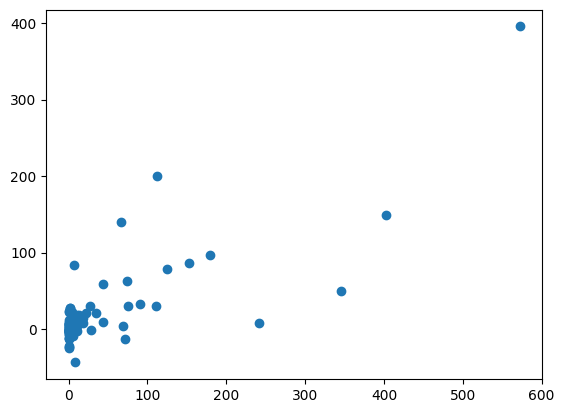

In [5]:
from labs.lab_3.linear_regression import LassoLinearRegressionModel, LeastSquaresLinearRegressionModel
from labs.lab_3.util.RegressionModelApi import RegressionModelApi
from typing import List
from labs.lab_3.checker import check_model

models: List[RegressionModelApi] = [LeastSquaresLinearRegressionModel()]
for model in models:
    check_model(model, train_dataframe=x_train, train_target=y_train, test_dataframe=x_test, test_target=y_test)